# Nonlinear pendulum problem #

A classic physics problem is the simple pendulum. This problem consist in the analysis of the following system and aims to describe it moviment based on the angle $\theta = \theta(t)$.


<p align="center">
  <img src="pendulo.jpg" width="300">
</p>


In this system, the resutant force on the mass is the tangential component of the weight force. For the 2° Newton's law:

$$ma = F_{r}$$
$$ma = -mg\sin(\theta)$$
$$a = -g\sin(\theta)$$

Being $\alpha = \ddot{\theta}(t)$ the angular acceleration of the pendulum, we have for the mass: $a = \ell\alpha$. This allows us to write:

$$\ell\alpha = -g\sin(\theta)$$
$$\ddot{\theta} = -\frac{g}{\ell}\sin(\theta)$$

Being this *nonlinear ODE* the equation that governs the moviment of the system. Usually is considered that $\theta$ have small values (usually smaller than $15°$), that allows us to use the simplification $\sin(\theta)\approx\theta$ (for $\theta$ in $rad$ ) and write the *ODE* as a linear equation:

$$\ddot{\theta} \approx -\frac{g}{\ell}\theta$$
$$\theta(t)\approx \theta_{0}\cos\left(\sqrt{\frac{g}{\ell}}t+\phi\right)$$

The pendulum that allows us using this simplification is called **Simple pendulum**, in other words, a Simple pendulum is a pendulum that has a low swing angle. For pendulums with a larger swing angle this simplification is not valid, so we need to solve the original *nonlinear ODE*, for this reason, these pendulums are called **Nonlinear pendulums**.

To solve this *ODE* we need to use numerical methods, and the goal of this file is to present one of these methods. Here, we will considerated that in the instant $t=0$ the pendulum starts from rest with a initial angle $\theta_{0}$, so we will considerated how initial conditions $\theta(0) = \theta_{0}$ and $\omega=\dot{\theta}(0) = 0$.

To solve the problem we are going to discretizate the time interval that we want to realize the analysis with a time-step $\Delta t$ and making $\theta_{i}$ the angle at the instant $t_{i}$ of this discretization. Did this, we can use the finite-difference approximation for second derivatives to write the equation as:

$$\frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{{\Delta t}^{2}} = -\frac{g}{\ell}\sin(\theta_{i})$$
$$\theta_{i+1} = 2\theta_{i} - \theta_{i-1} - \frac{g}{\ell}{\Delta t}^{2}\sin(\theta_{i})$$

With this, we can find the angle at an instant of time knowing the angles of the two instants before it. However, to start use this recursive relation we need at least the angle at the instant $t_{1}$, because we only have the angle at the instant $t_{0} = 0$. To find this angle we are going to use the Taylor series centering in the instant $t_{0}$ for the angle $\theta$:

$$\theta(t) = \sum\limits_{n=0}^{\infty}\frac{\theta^{(n)}(t_{0})}{n!}(t-t_{0})^{n}$$

Being $\theta_{1}$ the angle in the instant $t_{1}=t_{0}+\Delta t$, we can use this series and find:

$$\theta_{1} = \theta_{0} + \dot{\theta}_{0}\Delta t + \frac{\ddot{\theta}_{0}}{2}{\Delta t}^{2} + O({\Delta t}^{3})$$

However, we now from the initial conditions that $\dot{\theta}_{0} = 0$ and from the *nonlinear ODE* that $\ddot{\theta}_{0} = -\large{\frac{g}{\ell}}\small{\sin(\theta_{0})}$. If we choose and small enough $\Delta t$ we can despise the error of order ${\Delta t}^{3}$, so:

$$\theta_{1} \approx \theta_{0} -\frac{g}{2\ell}{\Delta t}^{2}\sin(\theta_{0})$$

We can find the angle at the instant $t_{1}$ and start to apply our recursive relation to find the other angles. This method is called **Verlet method** for the **nonlinear pendulum problem**.

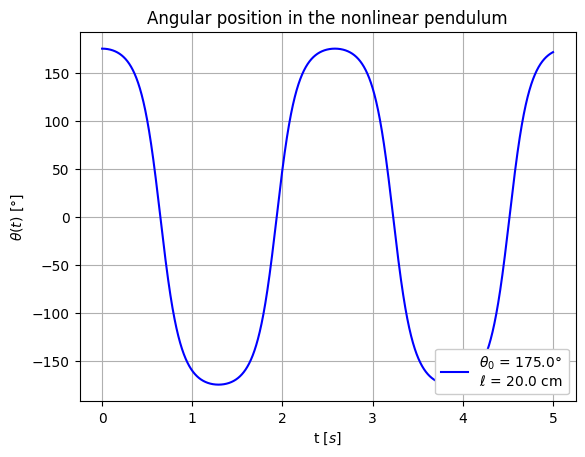

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import Physics_formulas as Physics

'''
Constants:
'''

g = 9.81 # Gravitational acceleration [m/s²]
l = 0.20 # Pendulum length [m]

'''
Time parameters:
'''

t_final = 5 # Final analysis time [s]
N = 500001 # Number of time steps
dt = t_final/(N-1) # Time step [s]

t = np.linspace(0, t_final, N) # Time vector [s]

'''
Initial conditions:
'''

theta_0 = float(input("Enter the initial angle in degrees: ")) # Initial angle [degrees]

theta_0_rad = np.deg2rad(theta_0) # Initial angle [rad]
theta_1 = theta_0_rad - (dt**2) * g*np.sin(theta_0_rad)/(2*l) # Angle in the second instant [rad]

'''
Numerical resolution:
'''

theta = np.zeros(N) # Angle vector [rad]
theta[0] = theta_0_rad
theta[1] = theta_1

for i in range(1, N-1,1):
    theta[i+1] = 2*theta[i] - theta[i-1] - (dt**2) * g * np.sin(theta[i])/l

theta = np.rad2deg(theta)

'''
Plot:
'''

plt.plot(t, theta, label = r'$\theta_{0}$ = ' + f'{theta[0]}°\n' + r"$\ell$ = " + f'{l*100} cm', color = 'blue')
plt.xlabel(r't [$s$]')
plt.ylabel(r'$\theta(t)$ [°]')
plt.grid(True)
plt.legend(loc='lower right', framealpha = 1)
plt.title("Angular position in the nonlinear pendulum")
plt.show()

### Comparation: Nonlinear pendulum vs simple pendulum ###

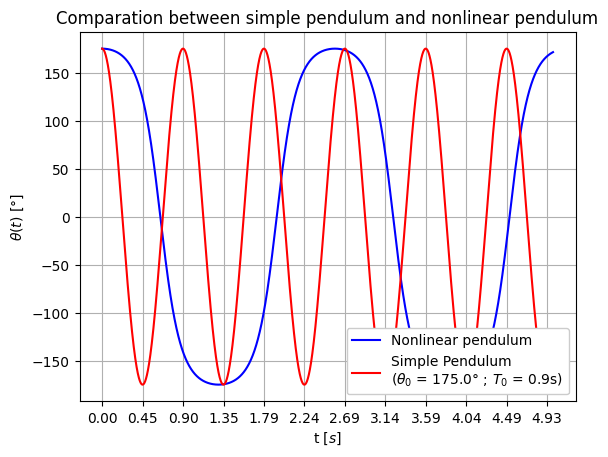

Advice: The simple pendulum solution are valid only for small initial angles (usually less than 15°), this graph is only a comparation between the two solutions.


In [66]:
'''
Simple pendulum description:
'''


def theta_simple(theta0,phi,time): # Solution for a simple pendulum
    w = np.sqrt(g/l)
    return theta0*np.cos(w*time + phi)

def periods_numbers(t_array): # Return an array with the periods of the simple pendulum in the t-axis
    T0 = 2*np.pi*np.sqrt(l/g)
    T0_array = []
    n = 0
    while (n*T0/2 <= np.max(t_array)):
        T0_array.append(round(n*T0/2,2))
        n += 1
    return np.array(T0_array)

theta_0_simple = theta_0
p = 0

thetaSimple = theta_simple(theta_0_simple, p, t)
Period_Numbers = periods_numbers(t)

plt.plot(t,theta, color = 'blue', label = 'Nonlinear pendulum')
plt.plot(t,thetaSimple, color = 'red', label = f'Simple Pendulum\n' +  r'$(\theta_{0}$ = ' + f'{theta_0_simple}° ; $T_{0}$ = {Period_Numbers[2]}s)')
plt.xlabel(r't [$s$]')
plt.ylabel(r'$\theta(t)$ [°]')
plt.xticks(Period_Numbers)
plt.grid(True)
plt.title("Comparation between simple pendulum and nonlinear pendulum"), 
plt.legend(loc = 'lower right', framealpha = 1)
plt.show()
print("\033[1mAdvice: The simple pendulum solution are valid only for small initial angles (usually less than 15°), this graph is only a comparation between the two solutions.\033[0m")

### Angular velocity and Angular acceleration in nonlinear pendulums ###

To calculate the angular velocity of a nonlinear pendulum knowing all values of the angular position in our time discretization, we can use backward finite-difference approximation for derivatives. This choise is justified by the initial conditions, since $\dot{\theta}(0) = \dot{\theta}_{0} = 0$.

$$\dot{\theta} = \omega = \frac{d\theta}{dt}$$
$$\dot{\theta}_{i} \approx \frac{\theta_{i}-\theta_{i-1}}{\Delta t}$$

For the angular acceleration, we can use the ODE that describes the analysed system:

$$\ddot{\theta}(t) = \alpha = -\frac{g}{\ell}\sin(\theta)$$

In our time discretization, this equation yields:

$$\ddot{\theta}_{i} = -\frac{g}{\ell}\sin(\theta_{i})$$

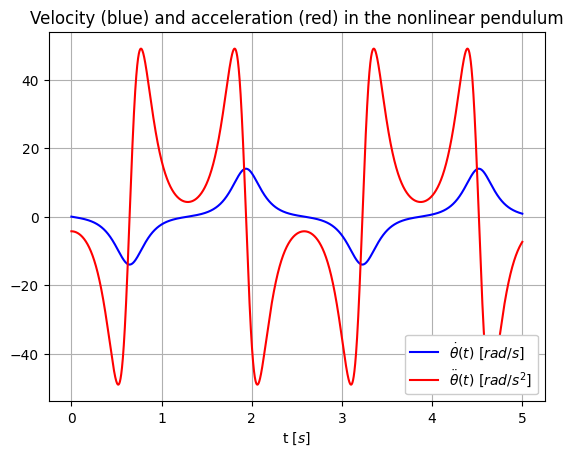

In [67]:
theta = np.deg2rad(theta)

'''
Angular velocity:
'''

w = np.zeros(N)
for i in range(1,N,1):
    w[i] = (theta[i] - theta[i-1])/dt

'''
Angular acceleration:
'''

alpha = np.zeros(N)
for i in range(0,N,1):
    alpha[i] = -g*np.sin(theta[i])/l

'''
Ploting the graps:
'''

plt.plot(t,w, color = 'blue', label = r'$\dot{\theta}(t)$ [$rad/s$]')
plt.plot(t,alpha, color = 'red', label = r'$\ddot{\theta}(t)$ [$rad/s^{2}$]')
plt.grid(True)
plt.xlabel(r't [$s$]')
plt.legend(loc = 'lower right', framealpha = 1)
plt.title("Velocity (blue) and acceleration (red) in the nonlinear pendulum")
plt.show()

### Energy conservation ###

The mecanic energy $E$ of a nonlinear pendulum with mass $m$ is devided it potential gravitational energy $U$ and it kinetic energy $K$.

$$K+U=E$$
$$\frac{1}{2}mv^{2}+mgh = E$$

In this pendulum, we have $v=\ell\dot{\theta}$ and $h = \ell[1-\cos(\theta)]$, so we can write this expression as:

$$\frac{1}{2}(\ell{\dot{\theta}})^{2}+g\ell[1-\cos(\theta)] = \epsilon$$

Where $\epsilon = E/m$. This greatness is called *specific energy* of the nonlinear pendum. From the **Energy conservation theorem** this greatness is a *constant*.

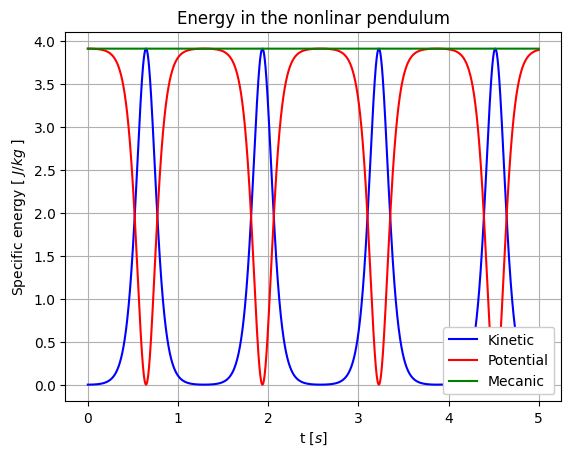

Advice: The specific mecanic energy presents variations because we calculate it using values obtained by numerical methods. If we increase "N" these variations will decrease.


In [68]:
'''
Energies of the pendulum:
'''

k = Physics.specific_kinetic_energy(l,w)
u = Physics.specific_potential_gravitational_energy(l,theta)
e = Physics.specific_mecanic_energy(l,w,theta)

'''
Ploting the graphs:
'''

plt.plot(t, k, label = 'Kinetic', color = 'blue')
plt.plot(t, u, label = 'Potential', color = 'red')
plt.plot(t, e, label = 'Mecanic', color = 'green')
plt.xlabel(r't [$s$]')
plt.ylabel(r'Specific energy [ $J/kg$ ]')
plt.grid(True)
plt.legend(loc='lower right', framealpha = 1)
plt.title("Energy in the nonlinar pendulum")
plt.show()

print('\033[1mAdvice: The specific mecanic energy presents variations because we calculate it using values obtained by numerical methods. If we increase "N" these variations will decrease.\033[0m')